# Implementation of Chatbot using Natural Language Processing (NLP)
by ADITYA KUMAR

## *LEVEL 1: Implementing Chatbot using intents file.*

## 1. Importing Required Libraries
1. **json** :To load the chatbot's intents file (intents.json), which contains patterns and responses.
2. **random**: For selecting random responses from the available options for a predicted intent.
3. **LogisticRegression (from sklearn)**: A simple machine learning model used to classify user inputs into predefined intent tags.
4. **TfidfVectorizer (from sklearn)**: Converts text data into numerical representations using TF-IDF, which stands for Term Frequency-Inverse Document -   Frequency. This is used to prepare the input for the machine learning model.
4. **streamlit**: For building a web-based user interface for the chatbot.

In [72]:
import json
import random
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import streamlit as st

## 2. Loading and Preparing the Intents Data
Purpose: Loads the intents.json file, which contains the patterns (user inputs) and corresponding responses for various tags (categories/intents).

In [73]:
intents = json.load(open('intents.json'))
print(intents)

{'intents': [{'tag': 'greeting', 'patterns': ['Hi', 'How are you?', 'Is anyone there?', 'Hello', 'Good day', "What's up", 'how are ya', 'heyy', 'whatsup', '??? ??? ??'], 'responses': ['Hello!', 'Good to see you again!', 'Hi there, how can I help?'], 'context_set': ''}, {'tag': 'goodbye', 'patterns': ['cya', 'see you', 'bye bye', 'See you later', 'Goodbye', 'I am Leaving', 'Bye', 'Have a Good day', 'talk to you later', 'ttyl', 'i got to go', 'gtg'], 'responses': ['Sad to see you go :(', 'Talk to you later', 'Goodbye!', 'Come back soon'], 'context_set': ''}, {'tag': 'creator', 'patterns': ['what is the name of your developers', 'what is the name of your creators', 'what is the name of the developers', 'what is the name of the creators', 'who created you', 'your developers', 'your creators', 'who are your developers', 'developers', 'you are made by', 'you are made by whom', 'who created you', 'who create you', 'creators', 'who made you', 'who designed you'], 'responses': ['College student

## 3. Extracting Tags and Patterns
- Purpose: Separates the patterns and their corresponding tags into two lists:
  - patterns: A list of all user input examples (e.g., "Hi", "How are you?").
  - tags: A list of tags corresponding to each pattern (e.g., "greeting", "goodbye").

In [74]:
tags = []
patterns = []

for intent in intents['intents']:
    #print(intent)
    for pattern in intent['patterns']:
        patterns.append(pattern)
        tags.append(intent['tag'])

print(len(tags))  
print(len(patterns))

405
405


## 4. TF-IDF Vectorization
- TfidfVectorizer:
  - Converts text (patterns) into numerical features.
  - Captures the importance of each word in a pattern relative to the other patterns.
- fit_transform:
  - fit: Learns the vocabulary from the patterns.
  - transform: Converts the patterns into a sparse matrix representation for machine learning.

In [75]:
vector = TfidfVectorizer()
patterns_scaled = vector.fit_transform(patterns)

## 5. Training the Logistic Regression Model
- LogisticRegression: A supervised learning algorithm used here for multi-class classification (predicting tags).
- max_iter=10000: Sets the maximum number of iterations to ensure convergence for larger datasets.
- fit: Trains the model using the numerical representation of patterns (patterns_scaled) and their corresponding tags.

In [76]:
Bot = LogisticRegression(max_iter=10000)
Bot.fit(patterns_scaled,tags)

LogisticRegression(max_iter=10000)

## 6. Testing the Model
- input_message: Simulates user input (e.g., "Hi").
- vector.transform: Converts the input into the same numerical format as used during training.
- Bot.predict: Predicts the intent tag for the input message.

In [77]:
input_message = "Hi"
input_message = vector.transform([input_message])
print(Bot.predict(input_message))
# Output=['greeting']

input_message = "ttyl"
input_message = vector.transform([input_message])
print(Bot.predict(input_message))
# Output = ['goodbye']

['greeting']
['goodbye']


## 7. Chatbot Function

In [65]:
def Chatbot(input_message):
    input_message = vector.transform([input_message])
    pred_tag = Bot.predict(input_message)[0]
    for intent in intents['intents']:
        if intent['tag'] == pred_tag:
            response = random.choice(intent['responses'])
            return response
        
input_message = input('Enter user Message:')
print(Chatbot(input_message))

Enter user Message: bye


Goodbye!


## 8.Train and Save Model

In [78]:
import os
import json
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Create directory if it does not exist
os.makedirs('models', exist_ok=True)

# Save the trained model and vectorizer
with open('models/level1_model.pkl', 'wb') as f:
    pickle.dump((vectorizer, model), f)

print("Model and vectorizer saved successfully.")

Model and vectorizer saved successfully.


- Purpose: Defines the chatbot's behavior.
- Logic:
    - Converts the user's input message into numerical form using TfidfVectorizer.
    - Predicts the corresponding tag using the trained model.
    - Matches the predicted tag with its corresponding responses in the intents file.
    - Returns a random response from the matched tag's responses.

--------------------------------------------------------------------------------------------------------------------------------------------------------

# *LEVEL 2: Implementing Chatbot Using NLP on Custom Data*

--------------------------------------------------------------------------------------------------------------------------------------------------------

## 1. Importing Necessary Libraries
- numpy: Used for numerical computations (not directly used in the chatbot code).
- nltk: The Natural Language Toolkit, essential for NLP tasks like tokenization and lemmatization.
- string: Used for string manipulations, like removing punctuation.
- random: Provides random responses for greeting messages.

In [79]:
import numpy as np
import nltk
import string
import random

## 2. Loading and Preprocessing the Dataset

In [80]:
f = open('AI_Dataset.txt', 'r',errors = 'ignore')
raw_doc = f.read()

## 3. Tokenization

In [81]:
raw_doc = raw_doc.lower() # Converting entire text to lowercase
nltk.download('punkt') # Using the Punkt tokenizer
nltk.download('wordnet') # Using the wordnet dictionary
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rishuraj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rishuraj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Rishuraj\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [82]:
raw_doc

'\n\nwikipediathe free encyclopedia\nsearch wikipedia\nsearch\ndonate\ncreate account\nlog in\n\ncontents hide\n(top)\ngoals\n\ntechniques\n\napplications\n\nethics\n\nhistory\nphilosophy\n\nfuture\n\nin fiction\nsee also\nexplanatory notes\nreferences\n\nfurther reading\nexternal links\nartificial intelligence\n\narticle\ntalk\nread\nview source\nview history\n\ntools\nappearance hide\ntext\n\nsmall\n\nstandard\n\nlarge\nwidth\n\nstandard\n\nwide\ncolor (beta)\n\nautomatic\n\nlight\n\ndark\npage semi-protected\nfrom wikipedia, the free encyclopedia\n"ai" redirects here. for other uses, see ai (disambiguation), artificial intelligence (disambiguation), and intelligent agent.\npart of a series on\nartificial intelligence\n\nmajor goals\napproaches\napplications\nphilosophy\nhistory\nglossary\nvte\nartificial intelligence (ai), in its broadest sense, is intelligence exhibited by machines, particularly computer systems. it is a field of research in computer science that develops and studi

In [83]:
sentence_tokens = nltk.sent_tokenize(raw_doc)
word_tokens = nltk.word_tokenize(raw_doc)

- Sentence Tokenization: Splits the text into individual sentences using sent_tokenize.
- Word Tokenization: Splits the text into individual words using word_tokenize.

In [84]:
sentence_tokens[:5]

['\n\nwikipediathe free encyclopedia\nsearch wikipedia\nsearch\ndonate\ncreate account\nlog in\n\ncontents hide\n(top)\ngoals\n\ntechniques\n\napplications\n\nethics\n\nhistory\nphilosophy\n\nfuture\n\nin fiction\nsee also\nexplanatory notes\nreferences\n\nfurther reading\nexternal links\nartificial intelligence\n\narticle\ntalk\nread\nview source\nview history\n\ntools\nappearance hide\ntext\n\nsmall\n\nstandard\n\nlarge\nwidth\n\nstandard\n\nwide\ncolor (beta)\n\nautomatic\n\nlight\n\ndark\npage semi-protected\nfrom wikipedia, the free encyclopedia\n"ai" redirects here.',
 'for other uses, see ai (disambiguation), artificial intelligence (disambiguation), and intelligent agent.',
 'part of a series on\nartificial intelligence\n\nmajor goals\napproaches\napplications\nphilosophy\nhistory\nglossary\nvte\nartificial intelligence (ai), in its broadest sense, is intelligence exhibited by machines, particularly computer systems.',
 'it is a field of research in computer science that develo

In [85]:
word_tokens[:5]

['wikipediathe', 'free', 'encyclopedia', 'search', 'wikipedia']

## Display the Word Cloud

Showing the first 10 lines of the file:



WikipediaThe Free Encyclopedia
Search Wikipedia
Search
Donate
Create account
Log in

Contents hide
Length of text: 182597


Wikipedi


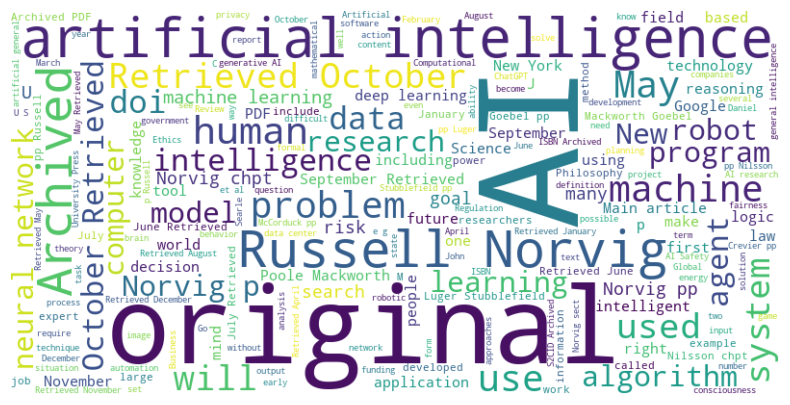

In [95]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
# Function to show the first few lines of the text data
def display_text_data(file_path, num_lines=10):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        print(f"Showing the first {num_lines} lines of the file:\n")
        for line in lines[:num_lines]:
            print(line.strip())

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def display_wordcloud(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
    except UnicodeDecodeError:
        with open(file_path, 'r', encoding='latin-1') as file:
            text = file.read()

    # Debugging: Check the length and content of the text
    print(f"Length of text: {len(text)}")
    print(text[:10])  # Print the first 1000 characters

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide the axes
    plt.show()  # Show the word cloud


# File path to your text data
file_path = 'AI_Dataset.txt'

# Display the text data
display_text_data(file_path)

# Display the word cloud
display_wordcloud(file_path)

## 4. Performing Text-Preprocessing Steps - Lemmatization
- Lemmatizer: Converts words to their base or root form (e.g., "running" → "run").
- Remove Punctuation: Strips punctuation from the text.
- Normalization: Combines lemmatization and punctuation removal for efficient preprocessing.

In [89]:
lemmer = nltk.stem.WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]
remove_punc_dict = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punc_dict)))

## 5. Greeting Function 
Purpose: Responds to greetings like "hi" or "hello" with random friendly replies.

In [90]:
greeting_inputs = ('hello', 'hi', 'whassup', 'how are you?')
greeting_responses = ('hi', 'Hey', 'Hey There!', 'There there!!')
def greet(sentence):
    for word in sentence.split():
        if word.lower() in greeting_inputs:
            return random.choice(greeting_responses)

## 6. Response Generation by the BOT
- TF-IDF Vectorizer: Converts text into numerical vectors based on Term Frequency-Inverse Document Frequency.
- Cosine Similarity: Measures the similarity between user input and dataset sentences.

Response Logic:
- If no match is found (req_tfidf == 0), the bot apologizes.
- Otherwise, it retrieves the most similar sentence.

In [91]:
# For intelligence of the Bot
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [92]:
def response(user_response):
    bo1_response = ''
    TfidfVec = TfidfVectorizer(tokenizer = LemNormalize, stop_words = 'english')
    tfidf = TfidfVec.fit_transform(sentence_tokens)
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx = vals.argsort()[0][-2] #finding the most similar
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if(req_tfidf == 0):
        bo1_response = bo1_response  + "I am sorry. Unable to understand you!"
        return bo1_response
    else:
        bo1_response = bo1_response +  sentence_tokens[idx]
        return bo1_response

## 7. Defining the Chatflow
- Greeting: Starts with an introductory message.
- Conversation Loop:
  - Checks if the user input is bye. If so, it ends the chat.
  - Checks for "thank you" or "thanks" to respond with a polite message.
  - For other inputs:
     - If it's a greeting, responds with a random greeting.
     - Otherwise, processes the input through the response function.

In [54]:
flag = True
print("Hello! I am the Retreival Learning Bot. Start typing your text after greeting to talk to me. For ending conversation type bye!")
while(flag == True):
    user_response = input()
    user_response = user_response.lower()
    if(user_response != 'bye'):
        if(user_response == 'thank you' or user_response == 'thanks'):
            flag = False
            print('Bot : you are WELCOME...')
        else:
            if(greet(user_response) != None):
                print('Bot:'  +  greet(user_response))
            else:
                sentence_tokens.append(user_response)
                word_tokens = word_tokens + nltk.word_tokenize(user_response)
                final_words = list(set(word_tokens))
                print('Bot: ', end = '')
                print(response(user_response))
                sentence_tokens.remove(user_response)
    else:
        flag = False
        print('Bot: Goodbye!')

Hello! I am the Retreival Learning Bot. Start typing your text after greeting to talk to me. For ending conversation type bye!


 Social intelligence


Bot: 

C:\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


contemporary social science.


 What is General intelligence?


Bot: artificial general intelligence.


 bye


Bot: Goodbye!


## Workflow Summary:
- The bot preprocesses the custom dataset using tokenization, normalization, and TF-IDF vectorization.
- User input is matched with the dataset using cosine similarity.
- The bot either returns the most relevant response or apologizes for not understanding.